In [1]:
# 🍅 Tomato Plant Growth Analysis - EDA

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 🔧 Setup
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 📥 Load Data
df = pd.read_csv('tomato_growth_data.csv')

# 🕵️ Quick Look
print("First 5 rows:")
display(df.head())

print("\nData info:")
print(df.info())

First 5 rows:


,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823,14.7,9.6,0.7,3.91,1.95
1,43830,17.2,9.8,1.0,3.89,1.95
2,43837,20.0,10.2,1.6,3.90,1.95
3,43844,23.3,10.3,2.4,3.93,1.96
4,43851,25.6,10.3,3.0,3.90,1.95



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         300 non-null    int64  
 1   Stem_elong   290 non-null    float64
 2   Stem_thick   300 non-null    float64
 3   Cum_trusses  285 non-null    float64
 4   stem_dens    300 non-null    float64
 5   plant_dens   300 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB
None


In [3]:
# 🧹 Clean Data
# Strip column names of spaces
df.columns = df.columns.str.strip()

# Handle missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# For now, fill NaNs in Cum_trusses with forward fill
df['Cum_trusses'] = df['Cum_trusses'].fillna(method='ffill')

# 🔍 Summary Statistics
print("\nSummary statistics:")
display(df.describe())



Missing values per column:
Time            0
Stem_elong     10
Stem_thick      0
Cum_trusses    15
stem_dens       0
plant_dens      0
dtype: int64

Summary statistics:


C:\Users\Abodein Okikiola\AppData\Local\Temp\ipykernel_13056\3183182003.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cum_trusses'] = df['Cum_trusses'].fillna(method='ffill')


,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
count,300.000000,290.000000,300.000000,300.000000,300.000000,300.000000
mean,44869.500000,387.196552,12.699333,76.018333,3.901967,1.950967
std,607.227305,217.673573,0.837898,43.869340,0.020211,0.010635
min,43823.000000,14.700000,9.600000,0.700000,3.840000,1.920000
25%,44346.250000,198.725000,12.200000,37.825000,3.890000,1.940000
50%,44869.500000,384.800000,12.950000,74.100000,3.900000,1.950000
75%,45392.750000,579.150000,13.300000,114.000000,3.912500,1.960000
max,45916.000000,761.200000,14.000000,154.600000,3.950000,1.980000


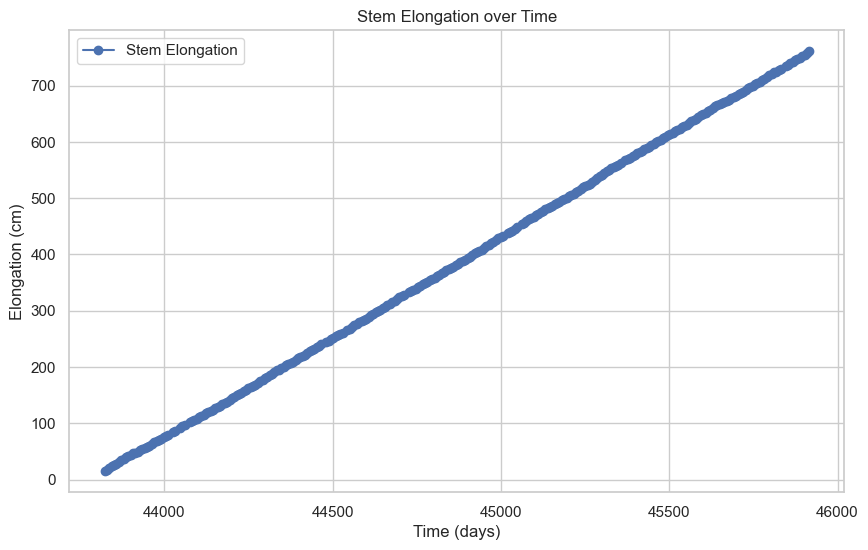

In [4]:
# 📈 Visualization 1 - Stem Elongation over Time
plt.plot(df['Time'], df['Stem_elong'], marker='o', label='Stem Elongation')
plt.title('Stem Elongation over Time')
plt.xlabel('Time (days)')
plt.ylabel('Elongation (cm)')
plt.legend()
plt.show()

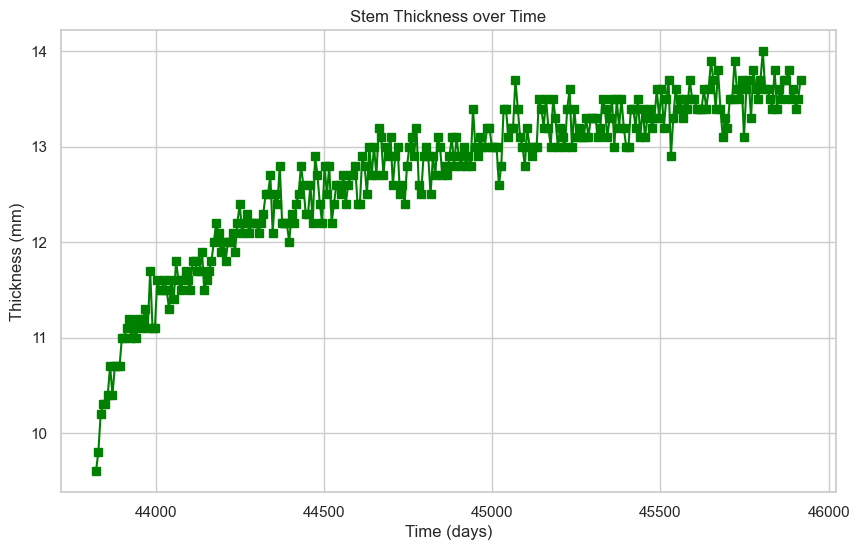

In [5]:
# 📈 Visualization 2 - Stem Thickness over Time
plt.plot(df['Time'], df['Stem_thick'], color='green', marker='s')
plt.title('Stem Thickness over Time')
plt.xlabel('Time (days)')
plt.ylabel('Thickness (mm)')
plt.show()

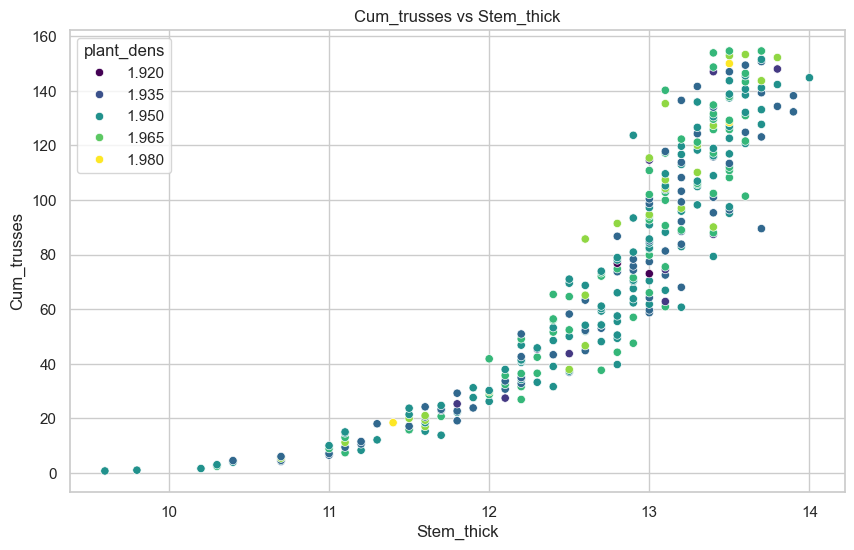

In [6]:
# 📊 Visualization 3 - Cum_trusses vs Stem Thickness
sns.scatterplot(x='Stem_thick', y='Cum_trusses', data=df, hue='plant_dens', palette='viridis')
plt.title('Cum_trusses vs Stem_thick')
plt.show()

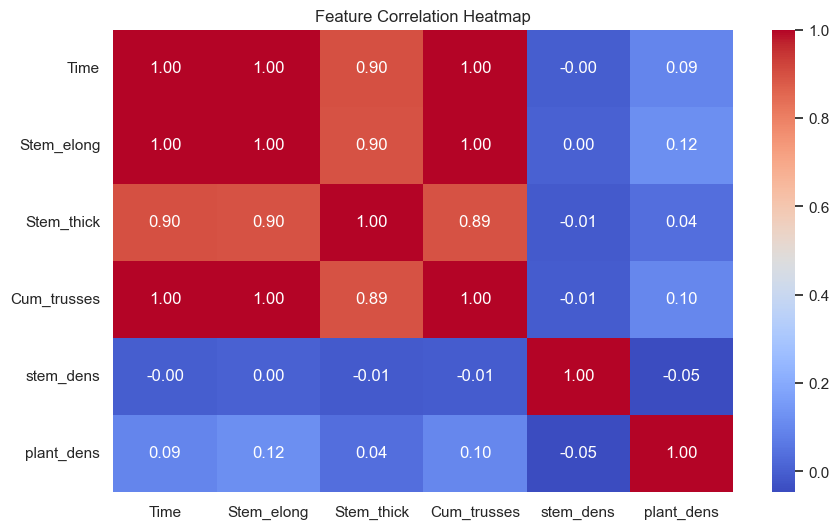

In [7]:

# 📉 Correlation Heatmap
plt.title("Feature Correlation Heatmap")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [8]:
# ✍️ Insights
print("\nInsights:")
print("""
1. Stem elongation increases nearly linearly with time.
2. Stem thickness also grows over time, but at a slower rate.
3. Cum_trusses appears related to stem_thick — thicker stems = more trusses.
4. Density values are mostly constant but still included in correlation.
""")


Insights:

1. Stem elongation increases nearly linearly with time.
2. Stem thickness also grows over time, but at a slower rate.
3. Cum_trusses appears related to stem_thick — thicker stems = more trusses.
4. Density values are mostly constant but still included in correlation.

